In [2]:
import pandas as pd
import scanpy as sc
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [5]:
adata = sc.read_h5ad('../session2/input_data/adata_course_part1.h5ad')

In [6]:
print(adata)

AnnData object with n_obs × n_vars = 14878 × 22546
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'fraction_mito', 'n_genes', 'num_spliced', 'num_ambiguous', 'num_unspliced', 'fraction_spliced', 'is_cell', 'is_high_quality', 'is_nonambient', 'is_not_debris', 'soupc_rho', 'sample'
    var: 'gene_ids', 'feature_types', 'soup_profile'
    layers: 'X_beforeAmbientRemoval', 'ambiguous', 'spliced', 'unspliced'


In [8]:
display(adata.obs.head())

,initial_size_spliced,initial_size_unspliced,initial_size,fraction_mito,n_genes,num_spliced,num_ambiguous,num_unspliced,fraction_spliced,is_cell,is_high_quality,is_nonambient,is_not_debris,soupc_rho,sample
AAACCCAAGTTGGCGA-rd10,5801,2365,5801,0.053433,3142,5727,558,2365,0.662081,1,1,1,1,0.241,rd10
AAACCCACAGAAACCG-rd10,1352,1174,1352,0.029447,1071,1337,153,1174,0.501877,1,1,1,1,0.241,rd10
AAACCCAGTGCCGTAC-rd10,1007,886,1007,0.039137,935,996,99,886,0.502776,1,1,1,1,0.241,rd10
AAACCCATCGCGCCAA-rd10,1652,2560,1652,0.120705,1409,1605,234,2560,0.364856,1,1,1,1,0.241,rd10
AAACGAAAGCAACCAG-rd10,1528,1564,1528,0.031646,1360,1517,158,1564,0.468354,1,1,1,1,0.241,rd10


In [9]:
display(adata.var.head())

,gene_ids,feature_types,soup_profile
Pcmtd1,ENSMUSG00000051285,Gene Expression,6.692449e-05
Cdh7,ENSMUSG00000026312,Gene Expression,1.499708e-06
Exo1,ENSMUSG00000039748,Gene Expression,1.874636e-07
Becn2,ENSMUSG00000104158,Gene Expression,0.000000e+00
Uxs1,ENSMUSG00000057363,Gene Expression,9.935569e-06


In [25]:
adata.layers['unspliced'][5247, 16984]
adata.var
#'Sntg1'

,gene_ids,feature_types,soup_profile
Pcmtd1,ENSMUSG00000051285,Gene Expression,6.692449e-05
Cdh7,ENSMUSG00000026312,Gene Expression,1.499708e-06
Exo1,ENSMUSG00000039748,Gene Expression,1.874636e-07
Becn2,ENSMUSG00000104158,Gene Expression,0.000000e+00
Uxs1,ENSMUSG00000057363,Gene Expression,9.935569e-06
...,...,...,...
ENSMUSG00000094915,ENSMUSG00000094915,Gene Expression,0.000000e+00
ENSMUSG00000079808,ENSMUSG00000079808,Gene Expression,0.000000e+00
ENSMUSG00000095041,ENSMUSG00000095041,Gene Expression,3.955481e-05
ENSMUSG00000095742,ENSMUSG00000095742,Gene Expression,7.498542e-07


In [30]:
adata.X.sum(axis = 1).shape
adata.obs['RNA_per_cell'] = adata.X.sum(axis = 1)

In [31]:
import matplotlib.pyplot as plt

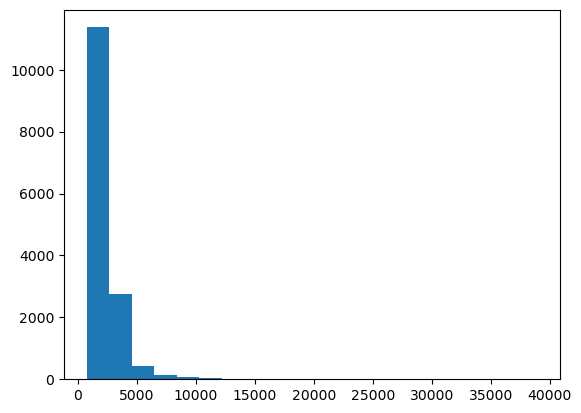

In [33]:
plt.hist(adata.obs['RNA_per_cell'], bins = 20);